In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Data.csv', index_col = [0,1])

In [3]:
df_firstSector = data.drop(columns = ['Second_sector_GDP', 'Third_sector_GDP', 'total_GDP', 'total_Investment', 'Second_sector_Inv', 'Third_sector_Inv'])

In [4]:
df_firstSector

ED  Expenditure   Irate  Population        Tax  \
Country Year                                                            
Austria 1994   849432.583    55.486122  6.8167   7928746.0  43.985937   
        1995   882550.058    56.000000  7.1067   7943489.0  43.100000   
        1996   961798.352    56.000000  5.1067   7953067.0  44.600000   
        1997   950097.615    52.700000  4.4192   7964966.0  45.300000   
        1998   971582.690    52.600000  3.9058   7971116.0  45.300000   
...                   ...          ...     ...         ...        ...   
Spain   2019  3641677.147    42.000000 -0.2173  46918951.0  35.200000   
        2020  3288511.875    51.400000 -0.3057  47318050.0  37.300000   
        2021  3542616.185    49.500000 -0.4906  47400798.0  38.100000   
        2022  3472923.261    46.400000  1.0997  47486843.0  37.500000   
        2023  3443773.026    45.400000  3.8647  48085361.0  37.000000   

                    Trade  First_sector_GDP  First_sector_Inv  
Country Year                                                   
Austria 1994  -3065.82896       3907.513358       2457.712241  
        1995  -2194.40000       3953.600000       2359.800000  
        1996  -2963.70000       3979.300000       2571.100000  
        1997  -1524.50000       4124.600000       2852.500000  
        1998   -439.00000       4287.400000       2600.700000  
...                   ...               ...               ...  
Spain   2019  37422.00000      34628.000000       6551.000000  
        2020  17118.00000      33937.000000       5951.000000  
        2021  12226.00000      36942.000000       6444.000000  
        2022  12125.00000      31335.000000       6035.000000  
        2023  58836.00000      31711.000000       6370.524463  

[600 rows x 8 columns]

In [5]:
df = df_firstSector.copy()

In [6]:
columns = df.columns

In [7]:
df

ED  Expenditure   Irate  Population        Tax  \
Country Year                                                            
Austria 1994   849432.583    55.486122  6.8167   7928746.0  43.985937   
        1995   882550.058    56.000000  7.1067   7943489.0  43.100000   
        1996   961798.352    56.000000  5.1067   7953067.0  44.600000   
        1997   950097.615    52.700000  4.4192   7964966.0  45.300000   
        1998   971582.690    52.600000  3.9058   7971116.0  45.300000   
...                   ...          ...     ...         ...        ...   
Spain   2019  3641677.147    42.000000 -0.2173  46918951.0  35.200000   
        2020  3288511.875    51.400000 -0.3057  47318050.0  37.300000   
        2021  3542616.185    49.500000 -0.4906  47400798.0  38.100000   
        2022  3472923.261    46.400000  1.0997  47486843.0  37.500000   
        2023  3443773.026    45.400000  3.8647  48085361.0  37.000000   

                    Trade  First_sector_GDP  First_sector_Inv  
Country Year                                                   
Austria 1994  -3065.82896       3907.513358       2457.712241  
        1995  -2194.40000       3953.600000       2359.800000  
        1996  -2963.70000       3979.300000       2571.100000  
        1997  -1524.50000       4124.600000       2852.500000  
        1998   -439.00000       4287.400000       2600.700000  
...                   ...               ...               ...  
Spain   2019  37422.00000      34628.000000       6551.000000  
        2020  17118.00000      33937.000000       5951.000000  
        2021  12226.00000      36942.000000       6444.000000  
        2022  12125.00000      31335.000000       6035.000000  
        2023  58836.00000      31711.000000       6370.524463  

[600 rows x 8 columns]

# Ridge model for real data

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import os
import joblib
import pandas as pd

feature_columns = ['ED', 'Expenditure', 'Irate', 'Population', 'Tax', 'Trade', 'First_sector_Inv']
X = df[feature_columns]
y = df['First_sector_GDP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model = Ridge()
model.fit(X_train_scaled, y_train)

coefficients = model.coef_
r2_score_train = model.score(X_train_scaled, y_train)
r2_score_test = model.score(X_test_scaled, y_test)

feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': coefficients
})
feature_importance_df.to_csv('feature_importance_global.csv', index=False)

print(feature_importance_df)
print(f"Train R² Score: {r2_score_train:.4f}")
print(f"Test  R² Score: {r2_score_test:.4f}")


            Feature   Coefficient
0                ED  -4255.652423
1       Expenditure    418.317825
2             Irate    234.640170
3        Population   6557.280411
4               Tax   -352.563881
5             Trade   -239.754317
6  First_sector_Inv  10403.222188
Train R² Score: 0.9686
Test  R² Score: 0.7551


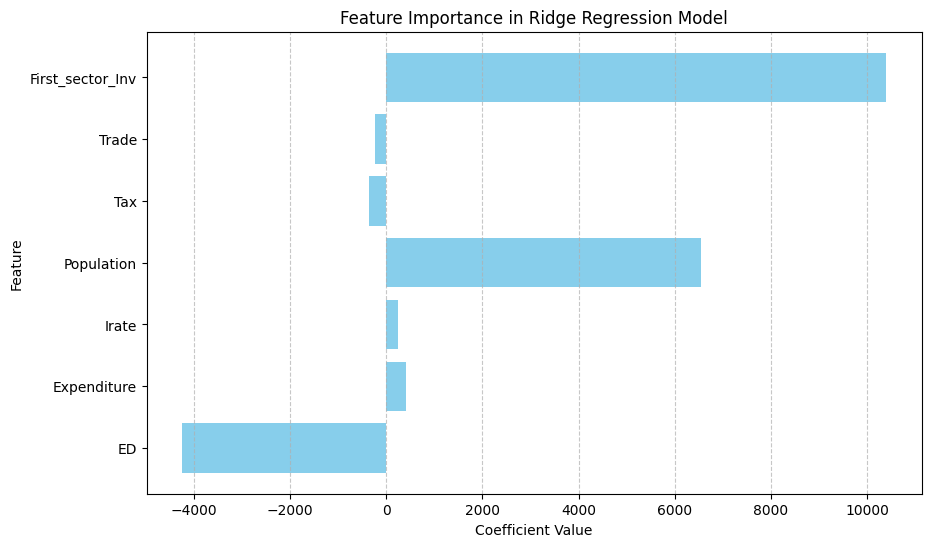

In [9]:
import matplotlib.pyplot as plt

feature_importance_df = pd.read_csv('feature_importance_global.csv')

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Ridge Regression Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('feature_importance_Ridge.png', dpi=300, bbox_inches='tight')
plt.show()

# XGBRegressor model for real data

In [10]:
from xgboost import XGBRegressor

feature_columns = ['ED', 'Expenditure', 'Irate', 'Population', 'Tax', 'Trade', 'First_sector_Inv']
target_column = 'First_sector_GDP'

X = df[feature_columns].dropna()
y = df[target_column].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model = XGBRegressor(random_state=42, max_depth = 3, learning_rate = 0.1, n_estimators=100)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
r2_score_train = model.score(X_train_scaled, y_train)
r2_score_test = model.score(X_test_scaled, y_test)

feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': model.feature_importances_
})
feature_importance_df.to_csv('feature_importance_level_xgboost.csv', index=False)

print(feature_importance_df)
print(f"Train R² Score (XGBoost - Level): {r2_score_train:.4f}")
print(f"Test  R² Score (XGBoost - Level): {r2_score_test:.4f}")


            Feature  Importance
0                ED    0.625857
1       Expenditure    0.001317
2             Irate    0.001352
3        Population    0.071584
4               Tax    0.001456
5             Trade    0.004189
6  First_sector_Inv    0.294245
Train R² Score (XGBoost - Level): 0.9986
Test  R² Score (XGBoost - Level): 0.9571


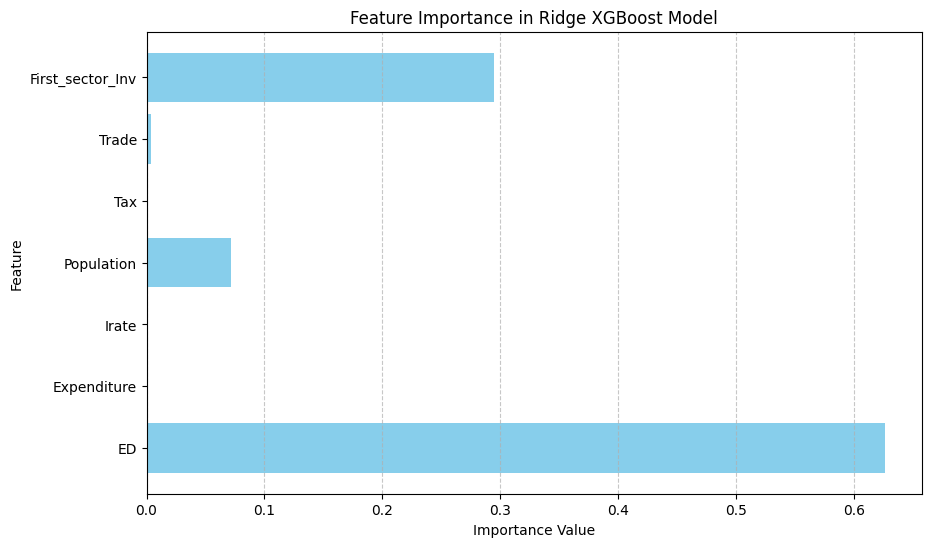

In [11]:
import matplotlib.pyplot as plt

feature_importance_df = pd.read_csv('feature_importance_level_xgboost.csv')

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Ridge XGBoost Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('feature_importance_XGBoost.png', dpi=300, bbox_inches='tight')
plt.show()

# First Difference 

In [12]:
df_diff1 = df[columns].groupby(level=0).diff().dropna()

In [13]:
df_diff1

ED  Expenditure   Irate  Population       Tax  \
Country Year                                                          
Austria 1995   33117.475     0.513878  0.2900     14743.0 -0.885937   
        1996   79248.294     0.000000 -2.0000      9578.0  1.500000   
        1997  -11700.737    -3.300000 -0.6875     11899.0  0.700000   
        1998   21485.075    -0.100000 -0.5134      6150.0  0.000000   
        1999    9251.134    -0.200000 -0.7225     11345.0 -0.400000   
...                  ...          ...     ...         ...       ...   
Spain   2019  -41346.936     0.500000 -0.0443    273881.0  0.000000   
        2020 -353165.272     9.400000 -0.0884    399099.0  2.100000   
        2021  254104.310    -1.900000 -0.1849     82748.0  0.800000   
        2022  -69692.924    -3.100000  1.5903     86045.0 -0.600000   
        2023  -29150.235    -1.000000  2.7650    598518.0 -0.500000   

                    Trade  First_sector_GDP  First_sector_Inv  
Country Year                                                   
Austria 1995    871.42896         46.086642        -97.912241  
        1996   -769.30000         25.700000        211.300000  
        1997   1439.20000        145.300000        281.400000  
        1998   1085.50000        162.800000       -251.800000  
        1999   1364.40000        250.000000         59.200000  
...                   ...               ...               ...  
Spain   2019   4203.00000       -660.000000        -10.000000  
        2020 -20304.00000       -691.000000       -600.000000  
        2021  -4892.00000       3005.000000        493.000000  
        2022   -101.00000      -5607.000000       -409.000000  
        2023  46711.00000        376.000000        335.524463  

[580 rows x 8 columns]

In [14]:
df_diff1

ED  Expenditure   Irate  Population       Tax  \
Country Year                                                          
Austria 1995   33117.475     0.513878  0.2900     14743.0 -0.885937   
        1996   79248.294     0.000000 -2.0000      9578.0  1.500000   
        1997  -11700.737    -3.300000 -0.6875     11899.0  0.700000   
        1998   21485.075    -0.100000 -0.5134      6150.0  0.000000   
        1999    9251.134    -0.200000 -0.7225     11345.0 -0.400000   
...                  ...          ...     ...         ...       ...   
Spain   2019  -41346.936     0.500000 -0.0443    273881.0  0.000000   
        2020 -353165.272     9.400000 -0.0884    399099.0  2.100000   
        2021  254104.310    -1.900000 -0.1849     82748.0  0.800000   
        2022  -69692.924    -3.100000  1.5903     86045.0 -0.600000   
        2023  -29150.235    -1.000000  2.7650    598518.0 -0.500000   

                    Trade  First_sector_GDP  First_sector_Inv  
Country Year                                                   
Austria 1995    871.42896         46.086642        -97.912241  
        1996   -769.30000         25.700000        211.300000  
        1997   1439.20000        145.300000        281.400000  
        1998   1085.50000        162.800000       -251.800000  
        1999   1364.40000        250.000000         59.200000  
...                   ...               ...               ...  
Spain   2019   4203.00000       -660.000000        -10.000000  
        2020 -20304.00000       -691.000000       -600.000000  
        2021  -4892.00000       3005.000000        493.000000  
        2022   -101.00000      -5607.000000       -409.000000  
        2023  46711.00000        376.000000        335.524463  

[580 rows x 8 columns]

# Ridge model for first Defference

In [15]:
X = df_diff1[feature_columns]
y = df_diff1[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model = Ridge()
model.fit(X_train_scaled, y_train)

print("Global Ridge R² Train:", model.score(X_train_scaled, y_train))
print("Global Ridge R² Test :", model.score(X_test_scaled, y_test))


Global Ridge R² Train: 0.014788928728936335
Global Ridge R² Test : -0.00219263769854372


# XGBoost model for first Defference

In [16]:
X = df_diff1[feature_columns]
y = df_diff1[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model = XGBRegressor(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train_scaled, y_train)

print("Global XGBoost R² Train:", model.score(X_train_scaled, y_train))
print("Global XGBoost R² Test :", model.score(X_test_scaled, y_test))

Global XGBoost R² Train: 0.8324859615469354
Global XGBoost R² Test : -0.47184066146468573


# Second difference

In [17]:
df_diff2 = df_diff1[columns].groupby(level=0).diff().dropna()

In [18]:
df_diff2

ED  Expenditure   Irate  Population       Tax  \
Country Year                                                          
Austria 1996   46130.819    -0.513878 -2.2900     -5165.0  2.385937   
        1997  -90949.031    -3.300000  1.3125      2321.0 -0.800000   
        1998   33185.812     3.200000  0.1741     -5749.0 -0.700000   
        1999  -12233.941    -0.100000 -0.2091      5195.0 -0.400000   
        2000   -2920.003    -0.800000  2.3282      8380.0 -0.400000   
...                  ...          ...     ...         ...       ...   
Spain   2019 -117981.596     0.000000 -0.0165    126204.0 -0.800000   
        2020 -311818.336     8.900000 -0.0441    125218.0  2.100000   
        2021  607269.582   -11.300000 -0.0965   -316351.0 -1.300000   
        2022 -323797.234    -1.200000  1.7752      3297.0 -1.400000   
        2023   40542.689     2.100000  1.1747    512473.0  0.100000   

                    Trade  First_sector_GDP  First_sector_Inv  
Country Year                                                   
Austria 1996  -1640.72896        -20.386642        309.212241  
        1997   2208.50000        119.600000         70.100000  
        1998   -353.70000         17.500000       -533.200000  
        1999    278.90000         87.200000        311.000000  
        2000    555.50000       -498.600000       -229.900000  
...                   ...               ...               ...  
Spain   2019  13495.00000      -2278.000000       -134.000000  
        2020 -24507.00000        -31.000000       -590.000000  
        2021  15412.00000       3696.000000       1093.000000  
        2022   4791.00000      -8612.000000       -902.000000  
        2023  46812.00000       5983.000000        744.524463  

[560 rows x 8 columns]

# Ridge model for second difference

In [19]:
X = df_diff2[feature_columns]
y = df_diff2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model = Ridge()
model.fit(X_train_scaled, y_train)

r2_score_train = model.score(X_train_scaled, y_train)
r2_score_test = model.score(X_test_scaled, y_test)

print(f"Train R² Score (Second Difference): {r2_score_train:.4f}")
print(f"Test  R² Score (Second Difference): {r2_score_test:.4f}")

Train R² Score (Second Difference): 0.0367
Test  R² Score (Second Difference): 0.0320


# XGBoost model for second difference

In [20]:
X = df_diff2[feature_columns]
y = df_diff2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model = XGBRegressor(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train_scaled, y_train)

r2_score_train = model.score(X_train_scaled, y_train)
r2_score_test = model.score(X_test_scaled, y_test)

print(f"Train R² Score (XGBoost - Second Difference): {r2_score_train:.4f}")
print(f"Test  R² Score (XGBoost - Second Difference): {r2_score_test:.4f}")

Train R² Score (XGBoost - Second Difference): 0.8364
Test  R² Score (XGBoost - Second Difference): 0.0257


# Third difference

In [21]:
df_diff3 = df_diff2[columns].groupby(level=0).diff().dropna()

In [22]:
df_diff3

ED  Expenditure   Irate  Population       Tax  \
Country Year                                                          
Austria 1997 -137079.850    -2.786122  3.6025      7486.0 -3.185937   
        1998  124134.843     6.500000 -1.1384     -8070.0  0.100000   
        1999  -45419.753    -3.300000 -0.3832     10944.0  0.300000   
        2000    9313.938    -0.700000  2.5373      3185.0  0.000000   
        2001   54575.547     2.200000 -4.6367     -9345.0  2.700000   
...                  ...          ...     ...         ...       ...   
Spain   2019  -27726.001    -1.600000 -0.0990     57036.0 -1.300000   
        2020 -193836.740     8.900000 -0.0276      -986.0  2.900000   
        2021  919087.918   -20.200000 -0.0524   -441569.0 -3.400000   
        2022 -931066.816    10.100000  1.8717    319648.0 -0.100000   
        2023  364339.923     3.300000 -0.6005    509176.0  1.500000   

                    Trade  First_sector_GDP  First_sector_Inv  
Country Year                                                   
Austria 1997   3849.22896        139.986642       -239.112241  
        1998  -2562.20000       -102.100000       -603.300000  
        1999    632.60000         69.700000        844.200000  
        2000    276.60000       -585.800000       -540.900000  
        2001  -1575.20000        818.500000        466.600000  
...                   ...               ...               ...  
Spain   2019  20768.00000      -4423.000000        -94.000000  
        2020 -38002.00000       2247.000000       -456.000000  
        2021  39919.00000       3727.000000       1683.000000  
        2022 -10621.00000     -12308.000000      -1995.000000  
        2023  42021.00000      14595.000000       1646.524463  

[540 rows x 8 columns]

# Ridge model for Third difference

In [23]:
X = df_diff3[feature_columns]
y = df_diff3[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model = Ridge()
model.fit(X_train_scaled, y_train)

r2_score_train = model.score(X_train_scaled, y_train)
r2_score_test = model.score(X_test_scaled, y_test)

print(f"Train R² Score (Third Difference): {r2_score_train:.4f}")
print(f"Test  R² Score (Third Difference): {r2_score_test:.4f}")

Train R² Score (Third Difference): 0.0685
Test  R² Score (Third Difference): 0.0408


# XGBoost model for Third difference

In [24]:
X = df_diff3[feature_columns]
y = df_diff3[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model = XGBRegressor(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train_scaled, y_train)

r2_score_train = model.score(X_train_scaled, y_train)
r2_score_test = model.score(X_test_scaled, y_test)

print(f"Train R² Score (XGBoost - Third Difference): {r2_score_train:.4f}")
print(f"Test  R² Score (XGBoost - Third Difference): {r2_score_test:.4f}")

Train R² Score (XGBoost - Third Difference): 0.8693
Test  R² Score (XGBoost - Third Difference): -0.0828
